Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


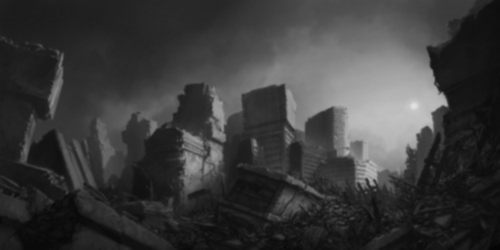

In [ ]:
#Abri a imagem cinza
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 0)

kernel = np.array([[1,2,1],[2,4,2],[1,2,1]]) * 1/16
img = cv2.filter2D(src=img, ddepth=8, kernel=kernel)

cv2_imshow(img)

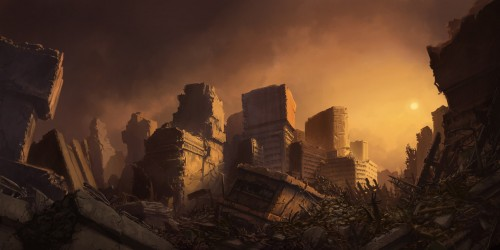

In [ ]:
#Abrir a imagem COLORIDA
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg',1)
cv2_imshow(img)

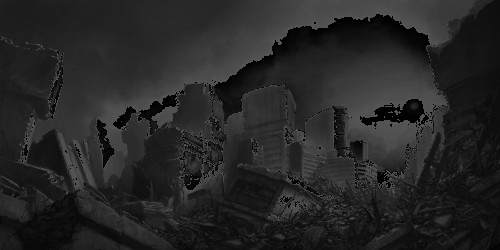

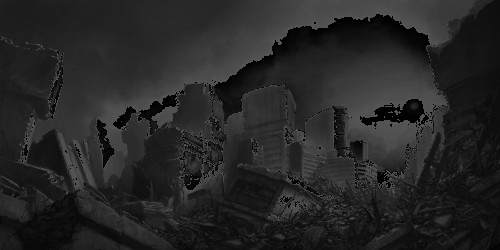

In [ ]:
#aplicando conversão básica

#numpy
img_grayscale_basic_np = ((img[:,:,0]+img[:,:,1]+img[:,:,2]) / 3)
img_grayscale_basic_np = np.array(img_grayscale_basic_np, dtype=np.uint8)
cv2_imshow(img_grayscale_basic_np)

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = np.clip((B+G+R), 0, 255) / 3
img_grayscale_basic_cv2 = img_grayscale_basic_cv2.astype(np.uint8)

cv2_imshow(img_grayscale_basic_cv2)

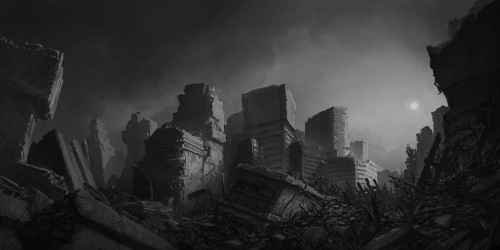

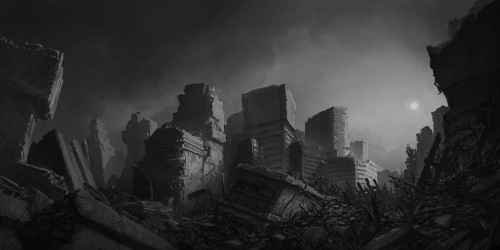

In [ ]:
#aplicando conversão ponderada
img_grayscale_pondered_np = 0.299*img[:,:,0] +  0.587*img[:,:,1] + 0.114*img[:,:,2]
img_grayscale_pondered_np = np.array(img_grayscale_pondered_np, dtype=np.uint8)
cv2_imshow(img_grayscale_pondered_np)

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = 0.299*B +  0.587*G + 0.114*R
img_grayscale_pondered_cv2 = img_grayscale_pondered_cv2.astype(np.uint8)

cv2_imshow(img_grayscale_pondered_cv2)

## Histograma de uma imagem

Fazer o histograma de uma imagem

In [ ]:
histogram = np.zeros(256)

H, W = img_grayscale_pondered_cv2.shape
for row in range(H):
  for col in range(W):
    idx = img_grayscale_pondered_cv2[row, col]
    histogram[idx] += 1

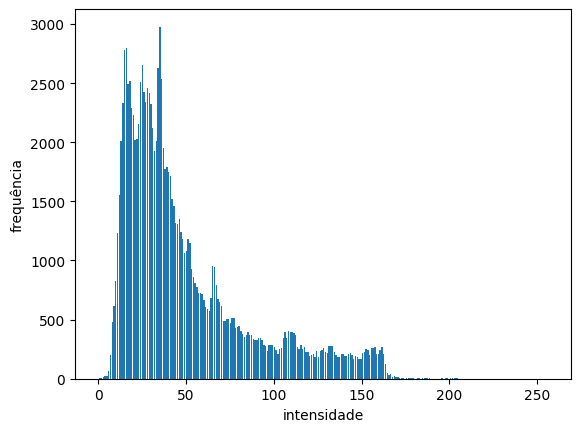

In [ ]:
x = np.linspace(0, 256, 256)
plt.bar(x, histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

Agora faça o histograma normalizado

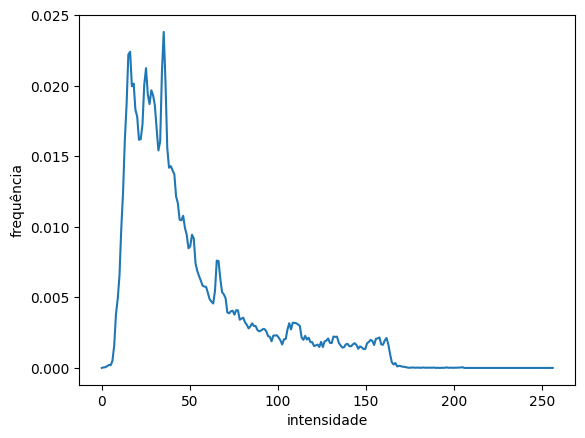

In [ ]:
H, W = img_grayscale_pondered_cv2.shape
histogram_normalized = histogram / (H * W)

x = np.linspace(0, 256, 256)
plt.plot(x, histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

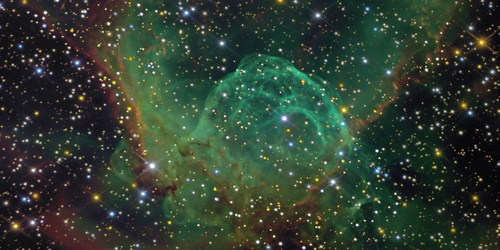

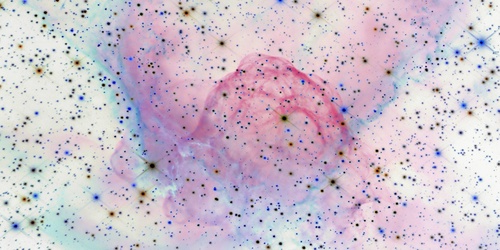

In [ ]:
#negativo

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t2.jpg', 1)

#img_negative_1 = (255 - img_in[:,:,:])
# ou
img_negative_2 = 255 - img_in

cv2_imshow(img_in)
#cv2_imshow(img_negative_1)
cv2_imshow(img_negative_2)

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

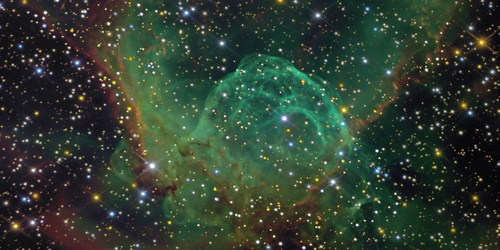

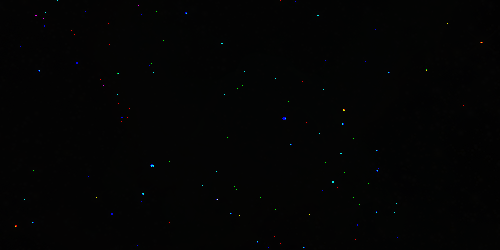

In [ ]:
#logaritimica

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t2.jpg', 1)

C = 1
epsilon = 1e-10 # Evita divisão por zero
img_out = np.array(C * np.log(1 + img_in + epsilon), dtype=np.uint8)

cv2_imshow(img_in)

cv2_imshow(img_out)

Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

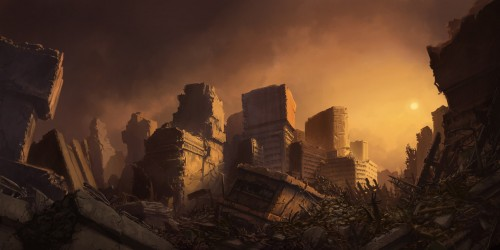

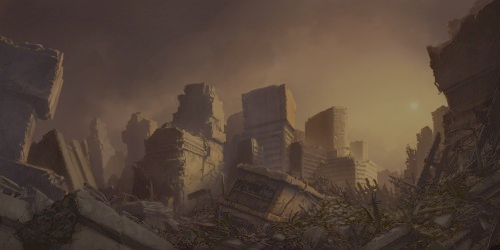

In [ ]:
#gamma

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 1)

C = 10
Y = 0.5

img_out = img_in.copy()
img_out = np.array((C * img_out ** Y), dtype=np.uint8)

cv2_imshow(img_in)
cv2_imshow(img_out)


Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

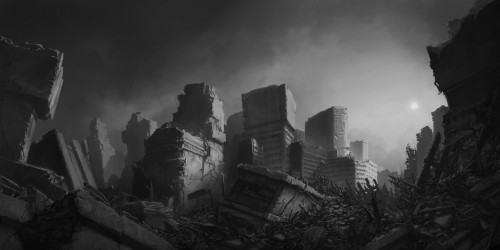

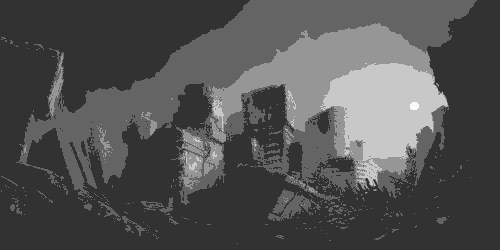

In [ ]:
#alargamento de contraste

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 0)

H, W = img_in.shape

img_out = np.zeros((H, W))

for row in range(H):
    for col in range(W):
      if (img_in[row, col] <= 50):
        img_out[row, col] = 50
      elif (img_in[row, col] <= 100):
        img_out[row, col] = 100
      elif (img_in[row, col] <= 150):
        img_out[row, col] = 150
      elif (img_in[row, col] <= 200):
        img_out[row, col] = 200
      elif (img_in[row, col] <= 250):
        img_out[row, col] = 250

img_out = np.array(img_out, dtype=np.uint8)

cv2_imshow(img_in)

cv2_imshow(img_out)

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

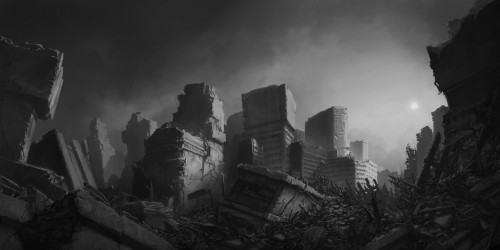

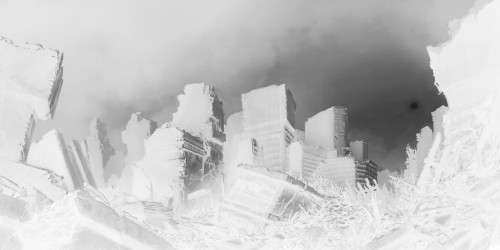

In [ ]:
#contraste e brilho

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 0)

a = -1
b = 1

img_out = a * img_in + b
img_out = np.array(img_out, dtype=np.uint8)

cv2_imshow(img_in)
cv2_imshow(img_out)

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

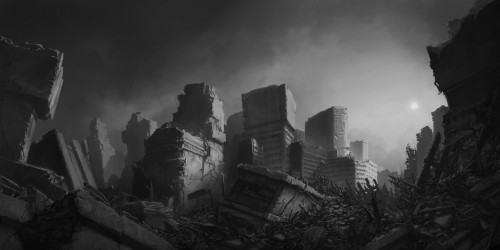

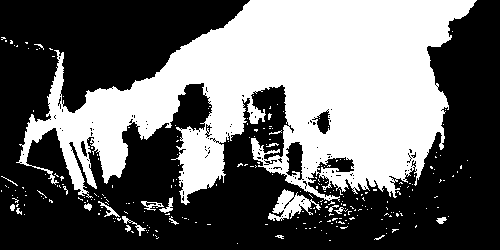

In [ ]:
#limiar
img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 0)

H, W = img_out.shape

img_out = np.zeros((H, W))

A = 50
K = 255

for row in range(H):
    for col in range(W):
      if (img_in[row, col] <= A):
        img_out[row, col] = 0
      else:
        img_out[row, col] = K

img_out = np.array(img_out, dtype=np.uint8)

cv2_imshow(img_in)
cv2_imshow(img_out)

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

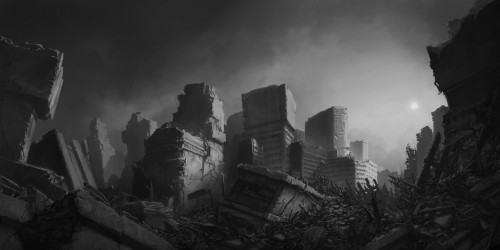

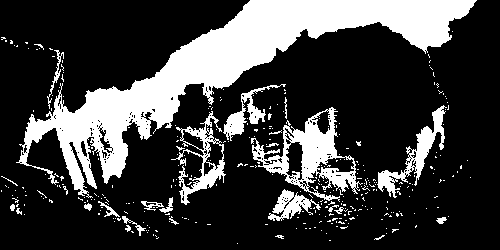

In [ ]:
#limiar (com fatiamento por plano)

img_in = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/t1.jpg', 0)

H, W = img_out.shape

img_out = np.zeros((H, W))

A = 50
B = 100
K = 255

for row in range(H):
    for col in range(W):
      position = img_in[row, col]
      if (position <= A or position >= B):
        img_out[row, col] = 0
      if (A < position < B):
        img_out[row, col] = K

img_out = np.array(img_out, dtype=np.uint8)

cv2_imshow(img_in)
cv2_imshow(img_out)